<a href="https://colab.research.google.com/github/cinnscott/datascience/blob/main/Data_StoryTelling_Scott.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset: Enfermedad Cardiovascular**

# Contexto comercial

Las enfermedades cardiovasculares son la principal causa de muerte en todo el mundo. Según la Organización Mundial de la Salud (OMS) mueren 17 millones de personas debido a estas enfermedades. Por lo tanto, es importante tomar medidas que ayuden a prevenir, controlar y diagnosticar a tiempo teniendo en cuenta todos los factor que influyen.

# Introducción al Dataset

El dataset consiste en un conjunto de datos obtenidos en exámenes de pacientes que hayan tenido o no enfermedades cardiovasculares. Está formado por los siguientes atributos:
•	Age: edad (años)
•	Heigh: altura (cm)
•	Weight: peso (Kg)
•	Gender: género
•	Systolic blood pressure (ap_hi): presión sanguínea sistólica
•	Diastolic blood pressure (ap_lo): presión sanguínea diastólica
•	Cholesterol: colesterol
•	Glucose (glu): glucosa
•	Smoking (smoke): fumador
•	Alcohol intake (alco): ingesta de alcohol
•	Physical activity (active): actividad física
•	Presence or absence of cardiovascular disease (cardio): presencia o ausencia de enfermedad cardiovascular
Los atributos pueden ser considerados factores de riesgo conocidos para la enfermedad cardiovascular. El dataset contiene dichos datos relevantes para el problema en cuestión.


# Objetivo

 El objetivo es identificar los patrones para poder utilizarlos en la predicción de la probabilidad de una persona de desarrollar una enfermedad cardiovascular.
Teniendo en cuenta los atributos del modelo, mi hipótesis basada en la ciencia es que una persona con hábitos poco saludables; ya sea obesidad, hipertensión, fumador y que realiza poca actividad física, tiene más probabilidades de desarrollar una enfermedad cardiovascular.

# Preguntas

Con el entrenamiento del modelo pretendemos responder las siguientes preguntas:
1. ¿Hay predisposición por género?
2. ¿La obesidad es un atributo que aumenta la probabilidad de enfermedad cardiovascular?
3.	¿La actividad física ayuda a disminuir la probabilidad de enfermedad?
4.	¿Cuánto influye la edad con respecto a otros atributos?
5.	De todos los atributos, ¿hay alguno más determinante que otro?
Contar con un modelo entrenado permitiría a los médicos a realizar diagnósticos más precisos, prevenir la enfermedad, monitorear o tratar pacientes de manera más efectiva.

# Análisis Exploratorio de Datos (EDA)

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1fW4FJJXTDW__SJcAdYk2BClNadymhmkd/view?usp=drive_link'

import pandas as pd
import numpy as np

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('x.csv')

df = pd.read_csv('x.csv')
print(df)

          id  age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
0          0   50    Male     168    62.0    110     80             normal   
1          1   55  Female     156    85.0    140     90  well above normal   
2          2   52  Female     165    64.0    130     70  well above normal   
3          3   48    Male     169    82.0    150    100             normal   
4          4   48  Female     156    56.0    100     60             normal   
...      ...  ...     ...     ...     ...    ...    ...                ...   
69995  99993   53    Male     168    76.0    120     80             normal   
69996  99995   62  Female     158   126.0    140     90       above normal   
69997  99996   52    Male     183   105.0    180     90  well above normal   
69998  99998   61  Female     163    72.0    135     80             normal   
69999  99999   56  Female     170    72.0    120     80       above normal   

               gluc smoke alco active cardio  Unnamed: 13  Unna

In [ ]:
df.shape

(70000, 16)

In [ ]:
df.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio          object
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
dtype: object

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,50,Male,168,62.0,110,80,normal,normal,No,No,Yes,No,NaN,NaN,NaN
1,1,55,Female,156,85.0,140,90,well above normal,normal,No,No,Yes,Yes,NaN,NaN,NaN
2,2,52,Female,165,64.0,130,70,well above normal,normal,No,No,No,Yes,NaN,NaN,NaN
3,3,48,Male,169,82.0,150,100,normal,normal,No,No,Yes,Yes,NaN,NaN,NaN
4,4,48,Female,156,56.0,100,60,normal,normal,No,No,No,No,NaN,NaN,NaN


# Cambio de variables categóricas a numéricas para el análisis de atributos

Cambio las variables categóricas por números para poder hacer análisis con dichos atributos, quedando:


*   **Normal=1**
*   **Above normal=2**
*   **Well above normal=3**
*   **No:0**
*   **Yes:1**

In [ ]:
df_new = df.replace({'normal':1,'above normal':2, 'well above normal':3, 'No':0,'Yes':1})
print(df_new)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50    Male     168    62.0    110     80            1     1   
1          1   55  Female     156    85.0    140     90            3     1   
2          2   52  Female     165    64.0    130     70            3     1   
3          3   48    Male     169    82.0    150    100            1     1   
4          4   48  Female     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   53    Male     168    76.0    120     80            1     1   
69996  99995   62  Female     158   126.0    140     90            2     2   
69997  99996   52    Male     183   105.0    180     90            3     1   
69998  99998   61  Female     163    72.0    135     80            1     2   
69999  99999   56  Female     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  Unnamed: 13  Unnamed: 14  U

In [ ]:
df_new.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
dtype: object

In [ ]:
print(pd.__version__)

1.5.3


In [ ]:
print(df_new.isnull().sum())

id                 0
age                0
gender             0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol        0
gluc               0
smoke              0
alco               0
active             0
cardio             0
Unnamed: 13    70000
Unnamed: 14    70000
Unnamed: 15    70000
dtype: int64


In [ ]:
columnas_a_eliminar= ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']
df_new_1=df_new.drop(columnas_a_eliminar, axis=1)
print (df_new_1)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50    Male     168    62.0    110     80            1     1   
1          1   55  Female     156    85.0    140     90            3     1   
2          2   52  Female     165    64.0    130     70            3     1   
3          3   48    Male     169    82.0    150    100            1     1   
4          4   48  Female     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   53    Male     168    76.0    120     80            1     1   
69996  99995   62  Female     158   126.0    140     90            2     2   
69997  99996   52    Male     183   105.0    180     90            3     1   
69998  99998   61  Female     163    72.0    135     80            1     2   
69999  99999   56  Female     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1

In [ ]:
#df.astype_nansafe({'active':'int64'}).dtypes
#df['active']=df['active'].astype_nansafe('int64')
df_new_1['active'] = df_new['active'].astype('int64')

In [ ]:
df_new_1.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
! pip install chart_studio

In [ ]:
! pip install bqplot
! pip install pingouin

In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

Con el dataset limpio, y las librerías instaladas me propongo graficar distintos atributos para responder las preguntas de la sección "Preguntas"

**¿Hay predisposición por género?**

Se realiza un gráfico Countplot para comparar por género la cantidad de personas con enfermedad cardíaca.

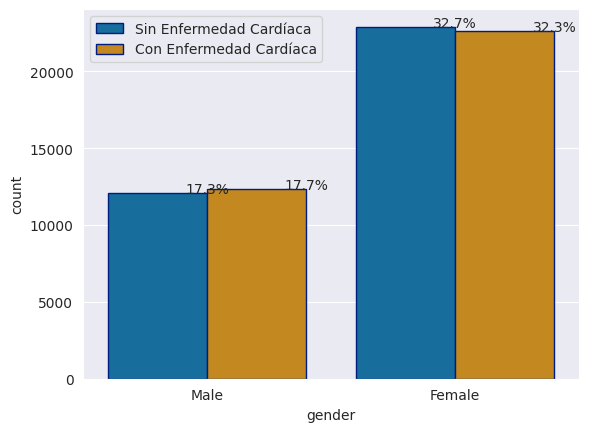

In [ ]:
ax= sns.countplot(x='gender',hue='cardio',data=df_new_1 ,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
total = float(len(df_new_1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(labels=["Sin Enfermedad Cardíaca","Con Enfermedad Cardíaca"])
plt.show()

*El porcentaje de mujeres con enfermedad cardíaca es mayor al porcentaje de hombres*

**¿La actividad física ayuda a disminuir la probabilidad de enfermedad?**

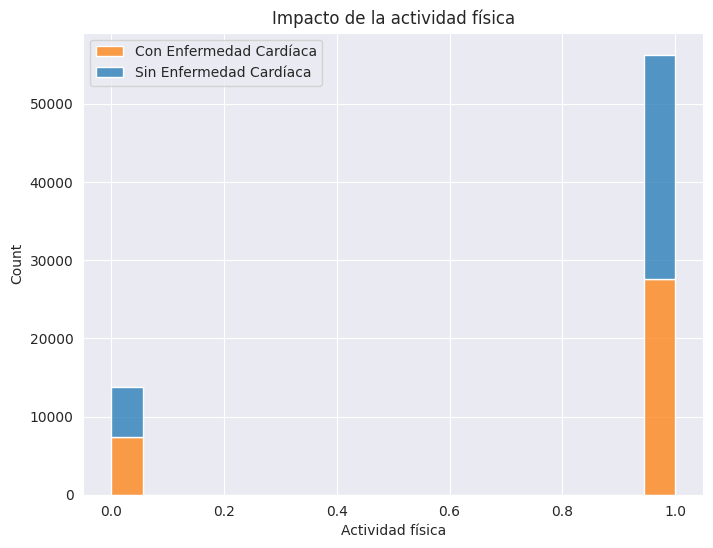

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_new_1, x="active", hue="cardio", multiple="stack")
plt.title('Impacto de la actividad física')
plt.xlabel('Actividad física')
plt.legend(labels=["Con Enfermedad Cardíaca","Sin Enfermedad Cardíaca"])
plt.show()

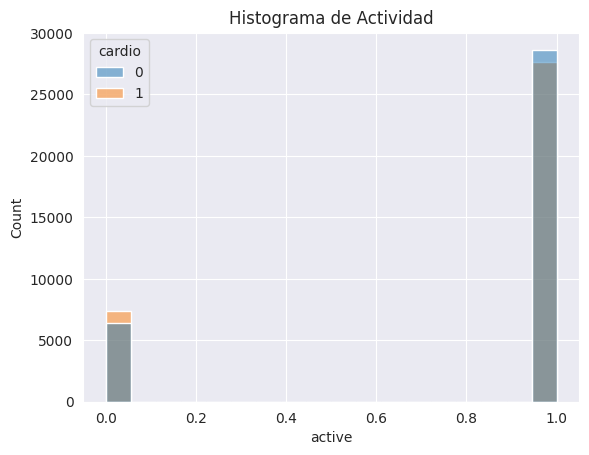

In [ ]:
sns.histplot(data=df_new_1, x="active", hue="cardio")
plt.title('Histograma de Actividad')
plt.show()

*Se cuenta con mayor cantidad de casos de personas con enfermedad cardíaca dentro del grupo que no realiza actividad física.*

**¿Cuánto influye la edad con respecto a otros atributos?**


*Teniendo en cuenta que*

*cardio 0= Sin enfermedad cardíaca*

*cardio 1= Con enfermedad cardíaca*

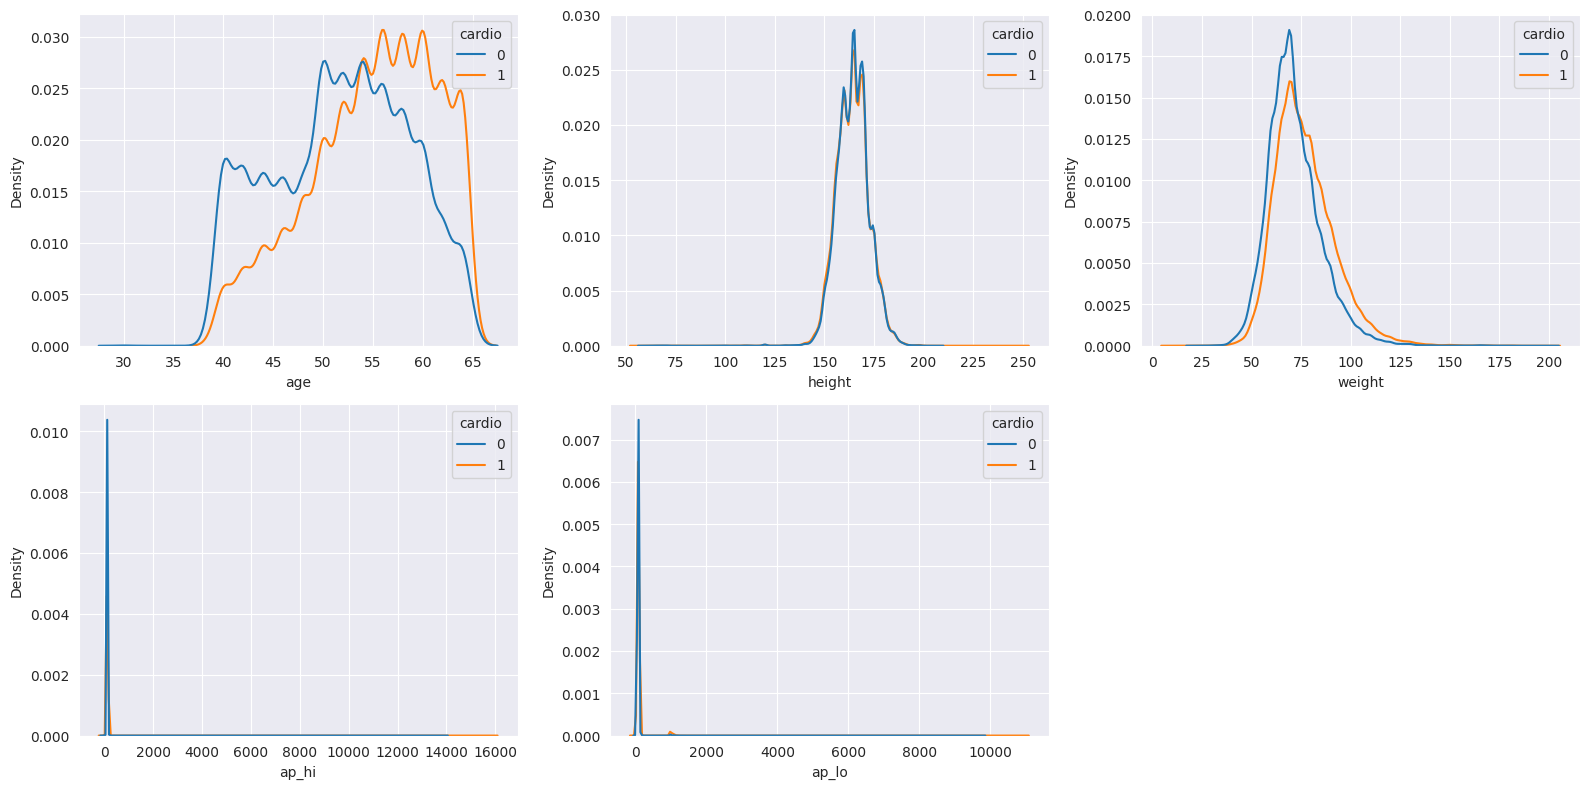

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.kdeplot(data=df_new_1, x='age', hue='cardio', ax=axes[0, 0])
sns.kdeplot(data=df_new_1, x='height', hue='cardio', ax=axes[0, 1])
sns.kdeplot(data=df_new_1, x='weight', hue='cardio', ax=axes[0, 2])
sns.kdeplot(data=df_new_1, x='ap_hi', hue='cardio', ax=axes[1, 0])
sns.kdeplot(data=df_new_1, x='ap_lo', hue='cardio', ax=axes[1, 1])

fig.delaxes(axes[1, 2])

plt.tight_layout()

*Al comparar todos los gráficos se puede observar que el de la edad es el que más diferencias se observa. Se nota la tendencia que a mayor edad mayor cantidad de casos con enfermedad cardíaca.*

**De todos los atributos, ¿hay alguno más determinante que otro?**

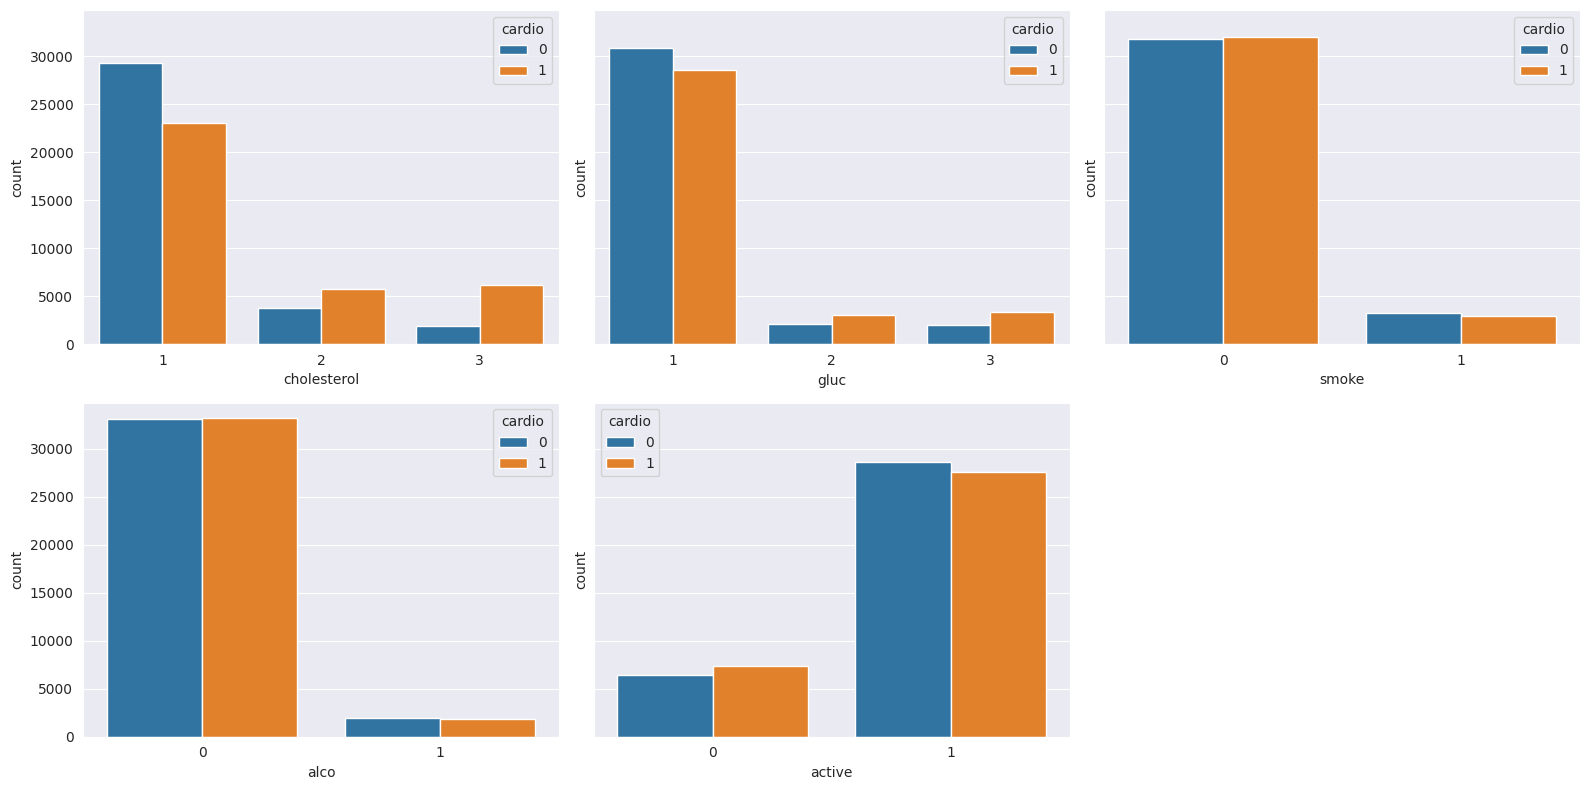

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
sns.countplot(data=df_new_1, x='cholesterol', hue='cardio', ax=axes[0, 0])
sns.countplot(data=df_new_1, x='gluc', hue='cardio', ax=axes[0, 1])
sns.countplot(data=df_new_1, x='smoke', hue='cardio', ax=axes[0, 2])
sns.countplot(data=df_new_1, x='alco', hue='cardio', ax=axes[1, 0])
sns.countplot(data=df_new_1, x='active', hue='cardio', ax=axes[1, 1])

fig.delaxes(axes[1, 2])

plt.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**Gráfico de torta para ver el porcentaje de pacientes con enfermedad cardiovascular vs sin enfermedad cadiovascular**

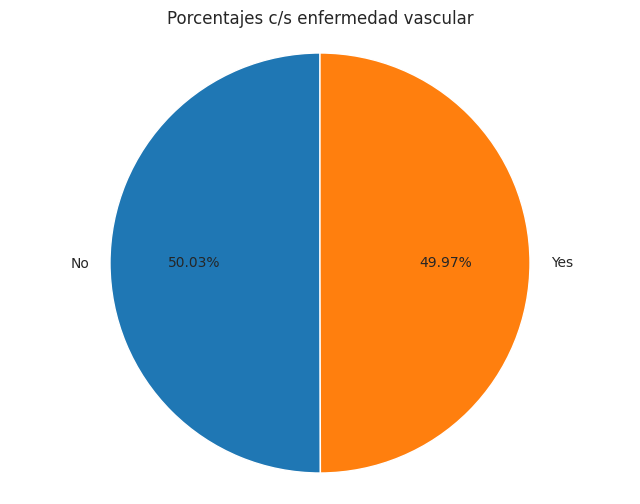

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
plt.pie(df_new_1['cardio'].value_counts(),labels=df["cardio"].unique(), autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("Porcentajes c/s enfermedad vascular")
plt.show()

**Histograma de distribución por edad: se observa que después de los 50 años es mayor la tendencia de enfermedades vasculares**

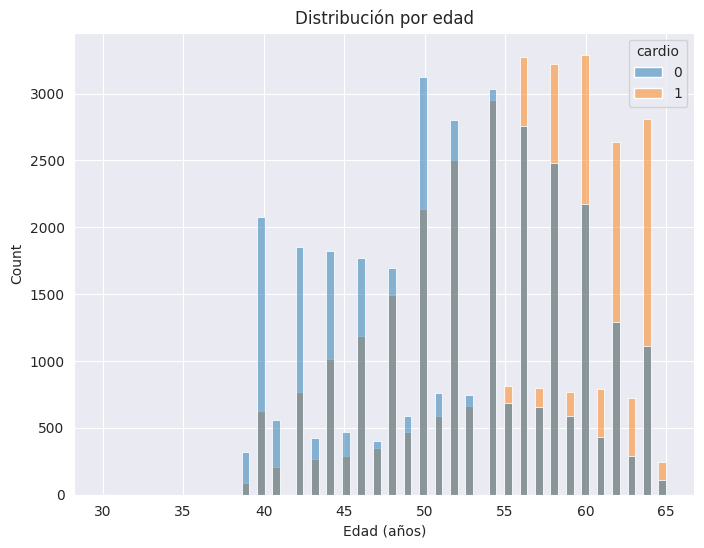

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_new_1, x="age", hue="cardio")
plt.title('Distribución por edad')
plt.xlabel('Edad (años)')
plt.show()

**Comparativa de los parámetros colesterol, glucosa, fumador, ingesta de alcohol, y realización de ejercicio de los que presentan vs no presentan enfermedades cardiovasculares**

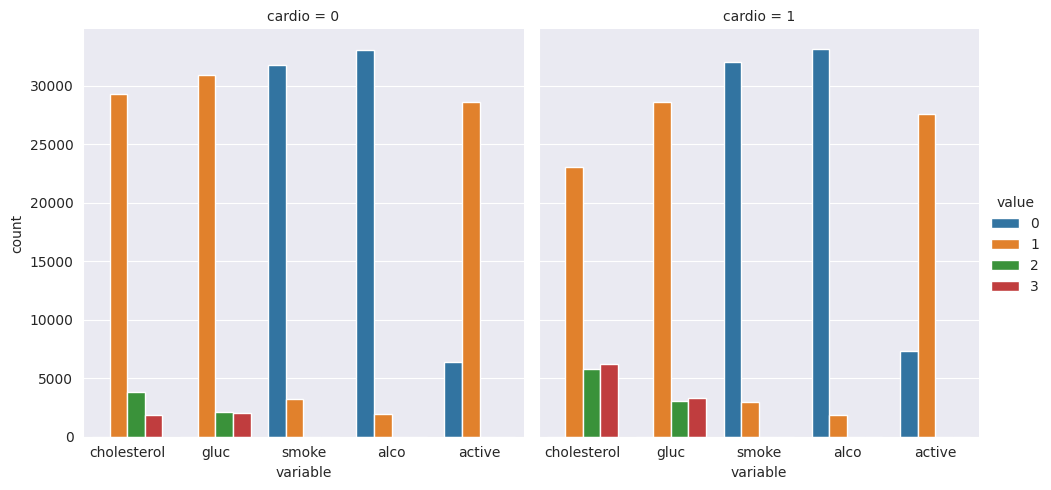

In [ ]:
df_long = pd.melt(df_new_1, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");

**Se realiza un diagrama de cajas para ver la distribución de los datos y las estádistica resumida. Se confirma lo observado más arriba que después de los 55 aumenta la posibilidad de las enfermedades cardiovasculares**

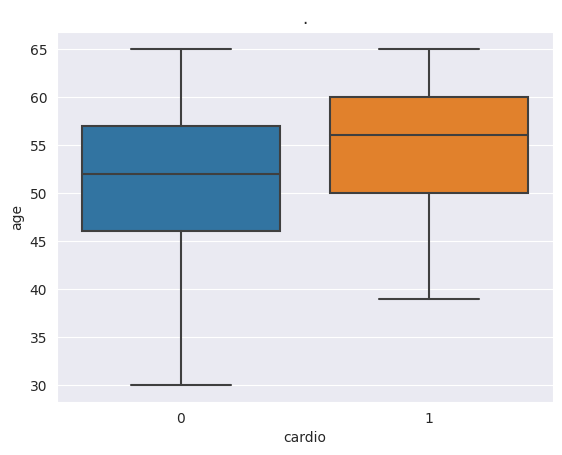

In [ ]:
sns.boxplot(x="cardio", y="age",
data=df_new_1)
plt.title('.')
plt.show()

Reemplazo la gender por variables numéricas siendo
Male=0
Female=1

In [ ]:
columnas_a_eliminar= ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']
df_new_1=df_new.drop(columnas_a_eliminar, axis=1)
df_new_2 = df_new_1.replace({'Male':0,'Female':1})
print(df_new_2)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       0     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   52       1     165    64.0    130     70            3     1   
3          3   48       0     169    82.0    150    100            1     1   
4          4   48       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   53       0     168    76.0    120     80            1     1   
69996  99995   62       1     158   126.0    140     90            2     2   
69997  99996   52       0     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1

Luego de limpiar los datos repetimos el gráfico de enfermedad cardíaca vs edad

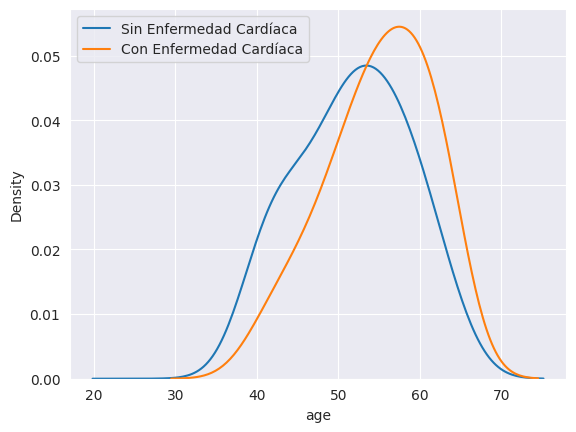

In [ ]:
df1= df_new_2[df_new_2['cardio']==0]
df2= df_new_2[df_new_2['cardio']==1]

sns.kdeplot(df1['age'], bw_method=0.5)
sns.kdeplot(df2['age'], bw_method=0.5)
plt.legend(labels=["Sin Enfermedad Cardíaca","Con Enfermedad Cardíaca"])
sns.move_legend (ax, 'upper center')
plt.show()

Se busca la relación de los atributos con un heatmap

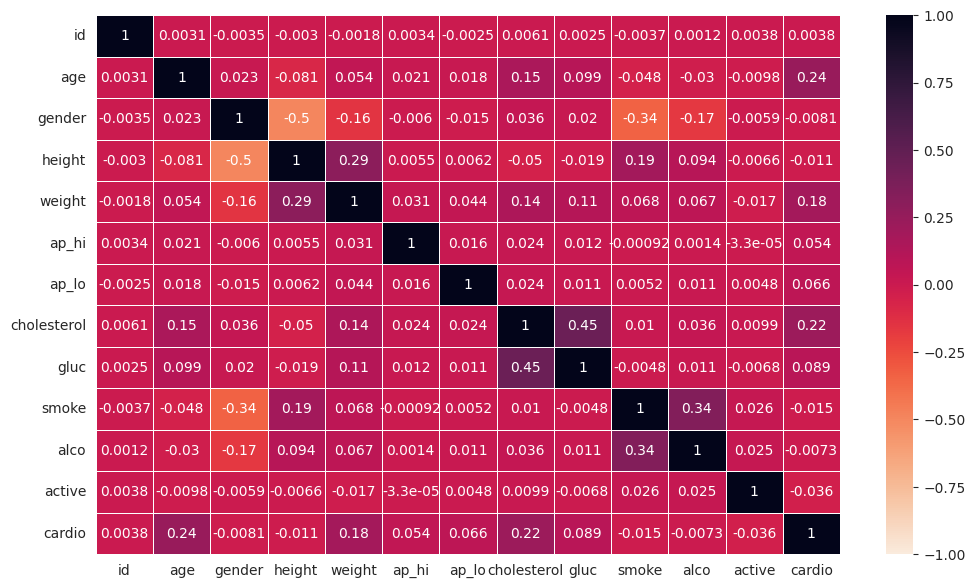

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df_new_2.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r",linewidths=0.5)
plt.show()

Del heatmap podemos concluir que no hay una correlación lineal entre las variables

**¿La obesidad es un atributo que aumenta la probabilidad de enfermedad cardiovascular?**


*La mediana de la caja de "Con enfermedad cardíaca* se encuentra por encíma de la mediana de la caja de "Sin enfermedad cardíaca" esto sugiere que los valores en ese grupo son mas altos. Por lo que podría sugerirse que el peso alto contribuye a la enfermedad cardíaca

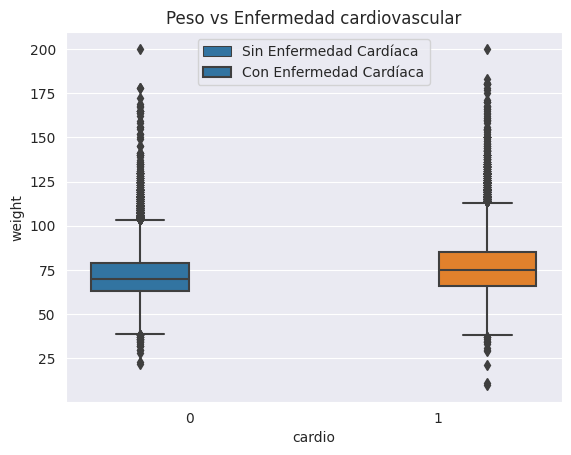

In [ ]:
ax= sns.boxplot(x='cardio', y = 'weight', data = df_new_2, hue='cardio')
plt.title("Peso vs Enfermedad cardiovascular");
plt.legend(labels=["Sin Enfermedad Cardíaca","Con Enfermedad Cardíaca"])
sns.move_legend (ax, 'upper center')
plt.show()

Igualmente no corresponde analizar únicamente el peso, sino que debería tenerse en cuenta el índice de masa corporal (BMI) para realmente poder contemplar las personas con sobrepreso.
El BMI debe calcularse como **BMI=(PESO (kg))/(ALTURA M)2)**

In [ ]:
def addBMI(rawData):
    rawData['BMI']=df_new_2['weight']/(df_new_1['height']/100)**2
    return rawData
def dataCleaning(rawData):
    #Eliminamos las filas que contienen valores negativos para las presiones (ap_hi and ap_lo)
    rawData =rawData.drop(rawData[rawData.ap_hi<0].index)
    rawData =rawData.drop(rawData[rawData.ap_lo<50].index)

    #Se eliminan filas que contienen valores extremadamente altos para ap_hi
    rawData =rawData.drop(rawData[rawData.ap_hi>300].index)

    outliers=[]
    #recorrer todo el conjunto de datos para realizar la operación
    for rawColumn in rawData:
        if(rawColumn=='age'or rawColumn=='weight'or rawColumn=='height'or rawColumn=='ap_hi'or rawColumn=='ap_lo' or rawColumn=='BMI'):
            #parametrizar un límite superior e inferior para la columna
            q1=rawData[rawColumn].describe()[4]
            q3=rawData[rawColumn].describe()[6]
            iqr=q3-q1
            topLimit=q3+1.5*iqr
            bottomLimit=q1-1.5*iqr

            #Selección de outlier con condiciones
            outliers=rawData[(rawData[rawColumn]>topLimit) | (rawData[rawColumn]<bottomLimit)]

            #Eliminación de outliers
            rawData=rawData.drop(rawData[rawData.id.isin(outliers['id'])].index)

            #Seleccionar outliers si ap_lo > ap_hi
            if(rawColumn=='ap_lo'):
                outliers=rawData[(rawData[rawColumn]>rawData['ap_hi'])]
                #Eliminación de outliers
                rawData=rawData.drop(rawData[rawData.id.isin(outliers['id'])].index)



    return rawData

cardioData=addBMI(df_new_2)
cardioData=dataCleaning(df_new_2)
print(df_new_2)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       0     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   52       1     165    64.0    130     70            3     1   
3          3   48       0     169    82.0    150    100            1     1   
4          4   48       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   53       0     168    76.0    120     80            1     1   
69996  99995   62       1     158   126.0    140     90            2     2   
69997  99996   52       0     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio        BMI  
0          0   

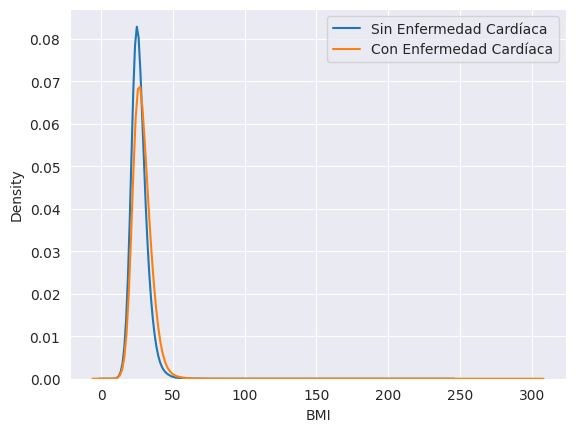

In [ ]:
df1= df_new_2[df_new_2['cardio']==0]
df2= df_new_2[df_new_2['cardio']==1]

sns.kdeplot(df1['BMI'], bw_method=0.5)
sns.kdeplot(df2['BMI'], bw_method=0.5)
plt.legend(labels=["Sin Enfermedad Cardíaca","Con Enfermedad Cardíaca"])
sns.move_legend (ax, 'upper center')
plt.show()

In [ ]:
print(cardioData)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       0     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   52       1     165    64.0    130     70            3     1   
3          3   48       0     169    82.0    150    100            1     1   
5          8   60       1     151    67.0    120     80            2     2   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69993  99991   54       1     172    70.0    130     90            1     1   
69994  99992   58       1     165    80.0    150     80            1     1   
69995  99993   53       0     168    76.0    120     80            1     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio        BMI  
0          0   

In [ ]:
print(df_new_2)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       0     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   52       1     165    64.0    130     70            3     1   
3          3   48       0     169    82.0    150    100            1     1   
4          4   48       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   53       0     168    76.0    120     80            1     1   
69996  99995   62       1     158   126.0    140     90            2     2   
69997  99996   52       0     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio        BMI  
0          0   

# Recomendaciones con base a los insights observados

Dado que se ve un aumento de enfermedades cardiovasculares en los pacientes con las siguientes condiciones:
- sexo femenino
- alto peso
- mayores de 55 años
- alto colesterol
- baja actividad física
Por lo que se proponen las siguientes recomendaciones:
1. Recomendaciones de estilo de vida: mantener hábitos saludables como hacer ejercicio regularmente y dieta saludable.
2. Recomendaciones de prevención: realizar exámenes de salud períodicos en personas mayores de 55 años, y personas que cumplan con los factores listados anteriormente

# Método de feature selection para reducir la dimensionalidad del dataset

Se elije el método Forward selection dado con este modelo hay un menor riesgo de perder características relevantes. Al ser un modelo sobre salud humana, es preferible incluir una característica no relevante.

Pasos a seguir

1. Definir un conjunto de datos de entrenamiento
2. Iniciar con el model vacío
3. Evaluar el rendimiento del modelo inicial
4. Seleccionar la característica más relevante
5. Agregar la característica seleccionada al modelo
6. Evaluar el rendimiento del modelo actualizado
7. Repetir los pasos 4 a 6 hasta que se cumpla el criterio de parada
8. Finalizar y utilizar el modelo seleccionado

In [ ]:
import statsmodels.api as sm

In [ ]:
data= df_new_2
features= data[['age','BMI', 'cholesterol', 'gluc', 'smoke','alco','active']]
target=data['active']

In [ ]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
selected_features= forward_selection(features, target)

<ipython-input-66-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-66-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-66-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-66-79271acff42d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-66-79

In [ ]:
print("Características seleccionadas:")
for feature in selected_features:
  print(features)

Características seleccionadas:
       age        BMI  cholesterol  gluc  smoke  alco  active
0       50  21.967120            1     1      0     0       1
1       55  34.927679            3     1      0     0       1
2       52  23.507805            3     1      0     0       0
3       48  28.710479            1     1      0     0       1
4       48  23.011177            1     1      0     0       0
...    ...        ...          ...   ...    ...   ...     ...
69995   53  26.927438            1     1      1     0       1
69996   62  50.472681            2     2      0     0       1
69997   52  31.353579            3     1      0     1       0
69998   61  27.099251            1     2      0     0       0
69999   56  24.913495            2     1      0     0       1

[70000 rows x 7 columns]
       age        BMI  cholesterol  gluc  smoke  alco  active
0       50  21.967120            1     1      0     0       1
1       55  34.927679            3     1      0     0       1
2       52  2

# Elección de algoritmo de regresión o clasificación para entrenar el dataset

Se elige un algortimo de regresión dado que se pretende estimar un valor de riesgo o probabilidad numérica asociado a la predisposición de la enfermedad.
Cómo métrica se utilizará *error absoluto medio (MAE)*




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

reemplazo X con las caracterísiticas del data set
reemplazo y con la variable objetivo

In [ ]:
X= data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI']]
y= data['cardio']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.44003339802281816


***El MAE indica el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales de la variable objetivo. Cuanto más bajo sea el valor, mejor será el modelo. ***

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.12200978867663481


***R2 cercano a 0 significa que no explica variabilidad de la variable objetivo y todas las predicciones son equivalentes a la media de los valores observados***

# DESAFÍO APIS

In [ ]:
import requests

url = "https://google-translate1.p.rapidapi.com/language/translate/v2/detect"

payload = { "q": "English is hard, but detectably so" }
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"Accept-Encoding": "application/gzip",
	"X-RapidAPI-Key": "9c93aeee35msh5cfb07817b686cbp11b2a3jsn6ae2aeafe791",
	"X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
}

response = requests.post(url, data=payload, headers=headers)

print(response.json())

{'data': {'detections': [[{'isReliable': False, 'confidence': 1, 'language': 'en'}]]}}


In [ ]:
import requests

url = "https://google-translate1.p.rapidapi.com/language/translate/v2"

payload = {
	"q": "Hello, world!",
	"target": "es",
	"source": "en"
}
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"Accept-Encoding": "application/gzip",
	"X-RapidAPI-Key": "9c93aeee35msh5cfb07817b686cbp11b2a3jsn6ae2aeafe791",
	"X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
}

response = requests.post(url, data=payload, headers=headers)

print(response.json())

{'data': {'translations': [{'translatedText': '¡Hola Mundo!'}]}}


In [ ]:
import requests

url = "https://google-translate1.p.rapidapi.com/language/translate/v2"

payload = {
	"q": "APIS project test succesfull",
	"target": "es",
	"source": "en"
}
headers = {
	"content-type": "application/x-www-form-urlencoded",
	"Accept-Encoding": "application/gzip",
	"X-RapidAPI-Key": "9c93aeee35msh5cfb07817b686cbp11b2a3jsn6ae2aeafe791",
	"X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
}

response = requests.post(url, data=payload, headers=headers)

print(response.json())

{'data': {'translations': [{'translatedText': 'Prueba del proyecto APIS exitosa'}]}}


#DATA WRANGLING

In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,0,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,0,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,0,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,0,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [ ]:
data.groupby(data['cardio'])